In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
# url for major cities in New Jersey by pupulation greater than 6K
url = 'http://www.city-data.com/city/New-Jersey.html'
  
# url for major cities in New Jersey by pupulation with latitude and longtitude
url2 = 'https://www.geonames.org/US/NJ/largest-cities-in-new-jersey.html'


'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8"/>\n<meta http-equiv="Content-Language" content="en"/>\n<meta http-equiv="X-UA-Compatible" content="IE=7, IE=9,IE=edge"/>\n<meta name="robots" content="index, follow"/>\n<meta name="robots" content="all"/>\n<meta name="googlebot" content="all"/>\n<meta name="msnbot" msnbot="all"/>\n<meta name="apple-mobile-web-app-capable" content="YES"/>\n<meta name="viewport" content="width=device-width, initial-scale=1"/>\n\n<!-- Quantcast Tag, part 1 -->\n<script type="text/javascript">\n  var _qevents = _qevents || [];\n  (function() {\n  var elem = document.createElement(\'script\');\n  elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")\n  + ".quantserve.com/quant.js";\n  elem.async = true;\n  elem.type = "text/javascript";\n  var scpt = document.getElementsByTagName(\'script\')[0];\n  scpt.parentNode.insertBefore(elem, scpt);\n  })();\n</script>\n<script type=\'text/javascript\'>window.ua={
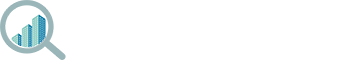
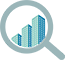
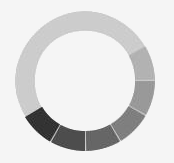

In [3]:
website_url = requests.get(url).text
website_url

In [4]:
website_url2 = requests.get(url2).text
website_url2

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd ">\n<html>\n<head>\n<title>Biggest Cities New Jersey, United States</title>\n<link rel="search" type="application/opensearchdescription+xml" title="geonames" href="https://www.geonames.org/opensearch-description.xml">\n<link href="/geonames.ico" rel="shortcut icon" >\n<link rel="StyleSheet" href="/geonames.css" type="text/css" >\n</head>\n<body>\n<table id="topmenutable" cellpadding="0" cellspacing="0"><tr>\n<td class="topmenu">&nbsp;<a href="/" title="GeoName Home">&nbsp;GeoNames Home</a>&nbsp;|&nbsp;<a href="/postal-codes/" title="Postal Codes">Postal Codes</a>&nbsp;|&nbsp;<a href="/export/" title="Database Dump and Webservice API">Download / Webservice</a>&nbsp;|&nbsp;<a href="/about.html" title="About GeoNames">About</a>&nbsp;</td>\n<td class="topsearch">\n   <form class="topsearch" name="searchForm" method="get" action="/servlet/geonames" >\n\n      search <input class="topmenu" n

In [5]:
# import BeautifulSoup function
from bs4 import BeautifulSoup

In [6]:
# BeautifulSoupcreates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping. 
# Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document
soup = BeautifulSoup(website_url, 'html')
#print(soup.prettify())
soup2 = BeautifulSoup(website_url2, 'html')

In [7]:
My_table = soup.find('table',{'class':'tabBlue tblsort tblsticky'})
# My_table
My_table2 = soup2.find('table',{'class':'restable sortable'})

In [8]:
table_rows = My_table.find_all('tr')
table_rows2 = My_table2.find_all('tr')

In [9]:
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['Map', 'Name', 'Population'])
df = df[~df['Map'].isnull()]  # to filter out bad rows
df

,Map,Name,Population
1,,Absecon,"8,376"
2,,Allamuchy-Panther Valley,"3,329"
3,,"Allendale, NJ","6,789"
4,,"Allenhurst, NJ",489
5,,"Allentown, NJ","1,807"
6,,"Allenwood, NJ",925
7,,Alloway,"1,402"
8,,"Alpha, NJ","2,312"
9,,"Alpine, NJ","1,894"
10,,"Anderson, NJ",342


In [10]:
data = []
for row in table_rows2:
    data.append([t.text.strip() for t in row.find_all('td')])

df2 = pd.DataFrame(data, columns=['Top City', 'Name', 'Population', 'Latitude/Longitude'])
df2 = df2[~df2['Top City'].isnull()]  # to filter out bad rows

In [11]:
df2

,Top City,Name,Population,Latitude/Longitude
1,1,Newark,"281,944",40.736 / -74.172
2,2,Jersey City,"264,290",40.728 / -74.078
3,3,Paterson,"147,754",40.917 / -74.172
4,4,Elizabeth,"129,007",40.664 / -74.211
5,5,Edison,"102,548",40.519 / -74.412
6,6,Toms River,"88,791",39.954 / -74.198
7,7,Clifton,"86,334",40.858 / -74.164
8,8,Trenton,"84,225",40.217 / -74.743
9,9,Camden,"76,119",39.926 / -75.12
10,10,Passaic,"71,085",40.857 / -74.128


In [12]:
# Clean the data
df2['Population'] = df2['Population'].str.replace(',', '')
df2["Population"] = pd.to_numeric(df2["Population"])
df2

,Top City,Name,Population,Latitude/Longitude
1,1,Newark,281944,40.736 / -74.172
2,2,Jersey City,264290,40.728 / -74.078
3,3,Paterson,147754,40.917 / -74.172
4,4,Elizabeth,129007,40.664 / -74.211
5,5,Edison,102548,40.519 / -74.412
6,6,Toms River,88791,39.954 / -74.198
7,7,Clifton,86334,40.858 / -74.164
8,8,Trenton,84225,40.217 / -74.743
9,9,Camden,76119,39.926 / -75.12
10,10,Passaic,71085,40.857 / -74.128


In [13]:
# Split the Lattitude/Longitude column to two seperate coloumns
df2[['Latitude','Longitude']] = df2['Latitude/Longitude'].str.split('/',expand=True)
df2

,Top City,Name,Population,Latitude/Longitude,Latitude,Longitude
1,1,Newark,281944,40.736 / -74.172,40.736,-74.172
2,2,Jersey City,264290,40.728 / -74.078,40.728,-74.078
3,3,Paterson,147754,40.917 / -74.172,40.917,-74.172
4,4,Elizabeth,129007,40.664 / -74.211,40.664,-74.211
5,5,Edison,102548,40.519 / -74.412,40.519,-74.412
6,6,Toms River,88791,39.954 / -74.198,39.954,-74.198
7,7,Clifton,86334,40.858 / -74.164,40.858,-74.164
8,8,Trenton,84225,40.217 / -74.743,40.217,-74.743
9,9,Camden,76119,39.926 / -75.12,39.926,-75.12
10,10,Passaic,71085,40.857 / -74.128,40.857,-74.128


In [14]:
# Remove unwanted column
df2 = df2.drop('Latitude/Longitude',1)
df2

,Top City,Name,Population,Latitude,Longitude
1,1,Newark,281944,40.736,-74.172
2,2,Jersey City,264290,40.728,-74.078
3,3,Paterson,147754,40.917,-74.172
4,4,Elizabeth,129007,40.664,-74.211
5,5,Edison,102548,40.519,-74.412
6,6,Toms River,88791,39.954,-74.198
7,7,Clifton,86334,40.858,-74.164
8,8,Trenton,84225,40.217,-74.743
9,9,Camden,76119,39.926,-75.12
10,10,Passaic,71085,40.857,-74.128


In [15]:
# Convert data from string to numberic
df2["Latitude"] = pd.to_numeric(df2["Latitude"])
df2["Longitude"] = pd.to_numeric(df2["Longitude"])

In [16]:
# Clean the data
df['Population'] = df['Population'].str.replace(',', '')
df["Population"] = pd.to_numeric(df["Population"])

In [17]:
# Get top cities order by population
NJ_cities = df.sort_values('Population',ascending=False)
NJ_cities = NJ_cities.drop('Map',1)
NJ_cities

,Name,Population
338,"Newark, NJ",280579
238,"Jersey City, NJ",262146
376,"Paterson, NJ",146753
139,"Elizabeth, NJ",128705
137,"Edison, NJ",101207
501,Toms River,88791
101,"Clifton, NJ",85927
503,"Trenton, NJ",84034
80,"Camden, NJ",77332
375,"Passaic, NJ",71509


In [18]:
# Set the index
df2.reset_index(inplace = True, drop = True)
df2

,Top City,Name,Population,Latitude,Longitude
0,1,Newark,281944,40.736,-74.172
1,2,Jersey City,264290,40.728,-74.078
2,3,Paterson,147754,40.917,-74.172
3,4,Elizabeth,129007,40.664,-74.211
4,5,Edison,102548,40.519,-74.412
5,6,Toms River,88791,39.954,-74.198
6,7,Clifton,86334,40.858,-74.164
7,8,Trenton,84225,40.217,-74.743
8,9,Camden,76119,39.926,-75.120
9,10,Passaic,71085,40.857,-74.128


In [19]:
# Drop population column
df3 = df2.filter(['Name', 'Latitude', 'Longitude'])
df3

,Name,Latitude,Longitude
0,Newark,40.736,-74.172
1,Jersey City,40.728,-74.078
2,Paterson,40.917,-74.172
3,Elizabeth,40.664,-74.211
4,Edison,40.519,-74.412
5,Toms River,39.954,-74.198
6,Clifton,40.858,-74.164
7,Trenton,40.217,-74.743
8,Camden,39.926,-75.120
9,Passaic,40.857,-74.128


In [20]:
# Let's get the geographical coordinates of Toronto
address = 'New Jersey, US'

geolocator = Nominatim(user_agent="nj_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Jersey are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Jersey are 40.0757384, -74.4041622.


In [21]:
# create map of New Jersey using latitude and longitude values
map_nj = folium.Map(location=[latitude, longitude], zoom_start=8)
map_nj

In [22]:
# create map of New Jersey using latitude and longitude values
map_nj = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, label in zip(df3['Latitude'], df3['Longitude'], df3['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nj)  
    
map_nj

In [23]:
# oursquare API to explore the neighborhoods and segment them
CLIENT_ID = 'AIHDIWSIHCLHGI12A1T12Z4PVLJV320XUNNPDBKYEXNONCQS' # your Foursquare ID
CLIENT_SECRET = '0CHL5INYGUS5NAG23DLRQCCJVQ5NC0EDYL2DSSBYDQDJ4B4P' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AIHDIWSIHCLHGI12A1T12Z4PVLJV320XUNNPDBKYEXNONCQS
CLIENT_SECRET:0CHL5INYGUS5NAG23DLRQCCJVQ5NC0EDYL2DSSBYDQDJ4B4P


In [24]:
df3.loc[0, 'Name']

'Newark'

In [25]:
# Get the neighborhood's latitude and longitude values
city_latitude = df3.loc[0, 'Latitude'] # neighborhood latitude value
city_longitude = df3.loc[0, 'Longitude'] # neighborhood longitude value

city_name = df3.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Newark are 40.736, -74.172.


In [26]:
LIMIT = 150 # limit of number of venues returned by Foursquare API

radius = 750 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=AIHDIWSIHCLHGI12A1T12Z4PVLJV320XUNNPDBKYEXNONCQS&client_secret=0CHL5INYGUS5NAG23DLRQCCJVQ5NC0EDYL2DSSBYDQDJ4B4P&v=20180605&ll=40.736,-74.172&radius=750&limit=150'

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d319ec2db1d810035004267'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Newark Central Business District',
  'headerFullLocation': 'Newark Central Business District, Newark',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': 40.74275000675, 'lng': -74.16310837242133},
   'sw': {'lat': 40.729249993249994, 'lng': -74.18089162757866}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c2249077e85c9282cc6bb21',
       'name': "Hobby's Delicatessen",
       'location': {'address': '32 Branford Pl',
        'crossStreet': 'at Halsey St',
        'lat': 4

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
# clean the json and structure it into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Hobby's Delicatessen,Deli / Bodega,40.735048,-74.174395
1,Fire Lounge,Lounge,40.733834,-74.171394
2,Blaze Pizza,Pizza Place,40.738387,-74.170809
3,Prudential Center,Hockey Arena,40.733608,-74.171155
4,Halsey Deli,Deli / Bodega,40.737610,-74.172935


In [30]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
# get venues
nj_venues = getNearbyVenues(names=df3['Name'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )

Newark
Jersey City
Paterson
Elizabeth
Edison
Toms River
Clifton
Trenton
Camden
Passaic


In [33]:
print(nj_venues.shape)
nj_venues.head()

(204, 7)


,Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Newark,40.736,-74.172,Hobby's Delicatessen,40.735048,-74.174395,Deli / Bodega
1,Newark,40.736,-74.172,Fire Lounge,40.733834,-74.171394,Lounge
2,Newark,40.736,-74.172,Halsey Deli,40.737610,-74.172935,Deli / Bodega
3,Newark,40.736,-74.172,Dinosaur Bar-B-Que,40.734755,-74.170207,BBQ Joint
4,Newark,40.736,-74.172,Blaze Pizza,40.738387,-74.170809,Pizza Place


In [34]:
nj_venues.groupby('Name').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Camden,8,8,8,8,8,8
Clifton,3,3,3,3,3,3
Edison,4,4,4,4,4,4
Elizabeth,26,26,26,26,26,26
Jersey City,15,15,15,15,15,15
Newark,66,66,66,66,66,66
Passaic,17,17,17,17,17,17
Paterson,41,41,41,41,41,41
Toms River,16,16,16,16,16,16


In [35]:
print('There are {} uniques categories.'.format(len(nj_venues['Venue Category'].unique())))

There are 88 uniques categories.


In [36]:
# Analyze each neighbourhood
# one hot encoding
nj_onehot = pd.get_dummies(nj_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nj_onehot['Name'] = nj_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [nj_onehot.columns[-1]] + list(nj_onehot.columns[:-1])
nj_onehot = nj_onehot[fixed_columns]

nj_onehot.head()

,Name,American Restaurant,Art Gallery,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Quad,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Gas Station,Gay Bar,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Hockey Arena,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Museum,Non-Profit,Park,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Poke Place,Pool Hall,Rental Car Location,Residential Building (Apartment / Condo),Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Skating Rink,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supplement Shop,Tattoo Parlor,Tex-Mex Restaurant,Theater,Thrift / Vintage Store,Video Game Store,Wings Joint
0,Newark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Newark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Newark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Newark,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Newark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
nj_onehot.shape

(204, 89)

In [38]:
nj_grouped = nj_onehot.groupby('Name').mean().reset_index()
nj_grouped

,Name,American Restaurant,Art Gallery,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Garden,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Quad,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Gas Station,Gay Bar,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Hockey Arena,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Museum,Non-Profit,Park,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Poke Place,Pool Hall,Rental Car Location,Residential Building (Apartment / Condo),Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Skating Rink,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supplement Shop,Tattoo Parlor,Tex-Mex Restaurant,Theater,Thrift / Vintage Store,Video Game Store,Wings Joint
0,Camden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.00000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.00000,0.0000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.125000,0.000000,0.000000,0.000
1,Clifton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000
2,Edison,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000
3,Elizabeth,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.00000,0.000000,0.000,0.038462,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.00000,0.0000,0.115385,0.000000,0.00,0.038462,0.000000,0.000000,0.038462,0.000000,0.000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,0.000000,0.000000,0.00000,0.00000

In [39]:
nj_grouped.shape

(10, 89)

In [40]:
num_top_venues = 5

for hood in nj_grouped['Name']:
    print("----"+hood+"----")
    temp = nj_grouped[nj_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Camden----
                   venue  freq
0  Performing Arts Venue  0.12
1         Breakfast Spot  0.12
2          Deli / Bodega  0.12
3     Seafood Restaurant  0.12
4                 Garden  0.12


----Clifton----
                     venue  freq
0                   Lawyer  0.33
1  Health & Beauty Service  0.33
2           Baseball Field  0.33
3      American Restaurant  0.00
4               Non-Profit  0.00


----Edison----
                 venue  freq
0       Ice Cream Shop  0.50
1       Farmers Market  0.25
2               Bakery  0.25
3  American Restaurant  0.00
4                 Park  0.00


----Elizabeth----
                 venue  freq
0          Pizza Place  0.12
1       Discount Store  0.12
2               Lounge  0.08
3       Clothing Store  0.04
4  Fried Chicken Joint  0.04


----Jersey City----
                 venue  freq
0  American Restaurant  0.07
1          Coffee Shop  0.07
2   Seafood Restaurant  0.07
3   Salon / Barbershop  0.07
4          Salad Place  0.07




In [41]:
# function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
# reate the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Name'] = nj_grouped['Name']

for ind in np.arange(nj_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nj_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,Breakfast Spot,Garden,Donut Shop,Performing Arts Venue,Chinese Restaurant,Seafood Restaurant,Deli / Bodega,Theater,Grocery Store,Gay Bar
1,Clifton,Health & Beauty Service,Lawyer,Baseball Field,Wings Joint,Fruit & Vegetable Store,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant
2,Edison,Ice Cream Shop,Farmers Market,Bakery,Garden,Discount Store,Donut Shop,Fast Food Restaurant,Filipino Restaurant,Food,Fried Chicken Joint
3,Elizabeth,Discount Store,Pizza Place,Lounge,South American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Sandwich Place,Fried Chicken Joint
4,Jersey City,American Restaurant,College Quad,Filipino Restaurant,Coffee Shop,Salon / Barbershop,Fruit & Vegetable Store,Breakfast Spot,Salad Place,Latin American Restaurant,Fast Food Restaurant
5,Newark,Pizza Place,Deli / Bodega,Bank,Coffee Shop,Bar,Donut Shop,Lounge,American Restaurant,Sandwich Place,Grocery Store
6,Passaic,Sandwich Place,Spanish Restaurant,Bank,Intersection,Gay Bar,Coffee Shop,Food,Pharmacy,Latin American Restaurant,Peruvian Restaurant
7,Paterson,Pizza Place,Fast Food Restaurant,Latin American Restaurant,Donut Shop,Mobile Phone Shop,Bank,Sandwich Place,Grocery Store,Steakhouse,Café
8,Toms River,Donut Shop,Convenience Store,Bar,Diner,Park,Museum,Coffee Shop,Gas Station,Spa,Pizza Place
9,Trenton,Wings Joint,Convenience Store,Discount Store,Pharmacy,Tattoo Parlor,Latin American Restaurant,Fast Food Restaurant,Gas Station,Fried Chicken Joint,Donut Shop


In [43]:
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

nj_grouped_clustering = nj_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nj_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 3, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [44]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nj_merged = df3

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nj_merged = nj_merged.join(neighborhoods_venues_sorted.set_index('Name'), on='Name')

nj_merged.head() # check the last columns!

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newark,40.736,-74.172,2,Pizza Place,Deli / Bodega,Bank,Coffee Shop,Bar,Donut Shop,Lounge,American Restaurant,Sandwich Place,Grocery Store
1,Jersey City,40.728,-74.078,2,American Restaurant,College Quad,Filipino Restaurant,Coffee Shop,Salon / Barbershop,Fruit & Vegetable Store,Breakfast Spot,Salad Place,Latin American Restaurant,Fast Food Restaurant
2,Paterson,40.917,-74.172,2,Pizza Place,Fast Food Restaurant,Latin American Restaurant,Donut Shop,Mobile Phone Shop,Bank,Sandwich Place,Grocery Store,Steakhouse,Café
3,Elizabeth,40.664,-74.211,2,Discount Store,Pizza Place,Lounge,South American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Sandwich Place,Fried Chicken Joint
4,Edison,40.519,-74.412,3,Ice Cream Shop,Farmers Market,Bakery,Garden,Discount Store,Donut Shop,Fast Food Restaurant,Filipino Restaurant,Food,Fried Chicken Joint


In [45]:
nj_merged.head() # check the last columns!

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newark,40.736,-74.172,2,Pizza Place,Deli / Bodega,Bank,Coffee Shop,Bar,Donut Shop,Lounge,American Restaurant,Sandwich Place,Grocery Store
1,Jersey City,40.728,-74.078,2,American Restaurant,College Quad,Filipino Restaurant,Coffee Shop,Salon / Barbershop,Fruit & Vegetable Store,Breakfast Spot,Salad Place,Latin American Restaurant,Fast Food Restaurant
2,Paterson,40.917,-74.172,2,Pizza Place,Fast Food Restaurant,Latin American Restaurant,Donut Shop,Mobile Phone Shop,Bank,Sandwich Place,Grocery Store,Steakhouse,Café
3,Elizabeth,40.664,-74.211,2,Discount Store,Pizza Place,Lounge,South American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Sandwich Place,Fried Chicken Joint
4,Edison,40.519,-74.412,3,Ice Cream Shop,Farmers Market,Bakery,Garden,Discount Store,Donut Shop,Fast Food Restaurant,Filipino Restaurant,Food,Fried Chicken Joint


In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nj_merged['Latitude'], nj_merged['Longitude'], nj_merged['Name'], nj_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
nj_merged

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newark,40.736,-74.172,2,Pizza Place,Deli / Bodega,Bank,Coffee Shop,Bar,Donut Shop,Lounge,American Restaurant,Sandwich Place,Grocery Store
1,Jersey City,40.728,-74.078,2,American Restaurant,College Quad,Filipino Restaurant,Coffee Shop,Salon / Barbershop,Fruit & Vegetable Store,Breakfast Spot,Salad Place,Latin American Restaurant,Fast Food Restaurant
2,Paterson,40.917,-74.172,2,Pizza Place,Fast Food Restaurant,Latin American Restaurant,Donut Shop,Mobile Phone Shop,Bank,Sandwich Place,Grocery Store,Steakhouse,Café
3,Elizabeth,40.664,-74.211,2,Discount Store,Pizza Place,Lounge,South American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Sandwich Place,Fried Chicken Joint
4,Edison,40.519,-74.412,3,Ice Cream Shop,Farmers Market,Bakery,Garden,Discount Store,Donut Shop,Fast Food Restaurant,Filipino Restaurant,Food,Fried Chicken Joint
5,Toms River,39.954,-74.198,2,Donut Shop,Convenience Store,Bar,Diner,Park,Museum,Coffee Shop,Gas Station,Spa,Pizza Place
6,Clifton,40.858,-74.164,4,Health & Beauty Service,Lawyer,Baseball Field,Wings Joint,Fruit & Vegetable Store,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant
7,Trenton,40.217,-74.743,0,Wings Joint,Convenience Store,Discount Store,Pharmacy,Tattoo Parlor,Latin American Restaurant,Fast Food Restaurant,Gas Station,Fried Chicken Joint,Donut Shop
8,Camden,39.926,-75.120,1,Breakfast Spot,Garden,Donut Shop,Performing Arts Venue,Chinese Restaurant,Seafood Restaurant,Deli / Bodega,Theater,Grocery Store,Gay Bar
9,Passaic,40.857,-74.128,2,Sandwich Place,Spanish Restaurant,Bank,Intersection,Gay Bar,Coffee Shop,Food,Pharmacy,Latin American Restaurant,Peruvian Restaurant


In [48]:
nj_merged.loc[nj_merged['Cluster Labels'] == 0, nj_merged.columns[[0] + list(range(1, nj_merged.shape[0]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
7,Trenton,40.217,-74.743,0,Wings Joint,Convenience Store,Discount Store,Pharmacy,Tattoo Parlor,Latin American Restaurant


In [49]:
nj_merged.loc[nj_merged['Cluster Labels'] == 1, nj_merged.columns[[0] + list(range(1, nj_merged.shape[0]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
8,Camden,39.926,-75.12,1,Breakfast Spot,Garden,Donut Shop,Performing Arts Venue,Chinese Restaurant,Seafood Restaurant


In [50]:
nj_merged.loc[nj_merged['Cluster Labels'] == 2, nj_merged.columns[[0] + list(range(1, nj_merged.shape[0]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Newark,40.736,-74.172,2,Pizza Place,Deli / Bodega,Bank,Coffee Shop,Bar,Donut Shop
1,Jersey City,40.728,-74.078,2,American Restaurant,College Quad,Filipino Restaurant,Coffee Shop,Salon / Barbershop,Fruit & Vegetable Store
2,Paterson,40.917,-74.172,2,Pizza Place,Fast Food Restaurant,Latin American Restaurant,Donut Shop,Mobile Phone Shop,Bank
3,Elizabeth,40.664,-74.211,2,Discount Store,Pizza Place,Lounge,South American Restaurant,Peruvian Restaurant,Fast Food Restaurant
5,Toms River,39.954,-74.198,2,Donut Shop,Convenience Store,Bar,Diner,Park,Museum
9,Passaic,40.857,-74.128,2,Sandwich Place,Spanish Restaurant,Bank,Intersection,Gay Bar,Coffee Shop


In [51]:
nj_merged.loc[nj_merged['Cluster Labels'] == 3, nj_merged.columns[[0] + list(range(1, nj_merged.shape[0]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
4,Edison,40.519,-74.412,3,Ice Cream Shop,Farmers Market,Bakery,Garden,Discount Store,Donut Shop


In [52]:
nj_merged.loc[nj_merged['Cluster Labels'] == 4, nj_merged.columns[[0] + list(range(1, nj_merged.shape[0]))]]

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
6,Clifton,40.858,-74.164,4,Health & Beauty Service,Lawyer,Baseball Field,Wings Joint,Fruit & Vegetable Store,Discount Store


In [53]:
# nwnhb = pd.read_csv("NewarkNhb.csv")

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_45ce0dc7a30f472ebe72eb8b49950dcd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='30sziRLn5Gq_mG44ni3Bta52MsIGCdzko6ZmZUCMsTI_',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_45ce0dc7a30f472ebe72eb8b49950dcd.get_object(Bucket='assignment8-donotdelete-pr-jhnazgutkpawgp',Key='NewarkNhb.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

nwnhb = pd.read_csv(body)
nwnhb.head()



,Neighborhood,Latitude,Longtitude
0,Clinton Hill,40.717000,-74.199000
1,Dayton,40.699600,-74.203300
2,Port Newark,40.690100,-74.147400
3,South Broad Valley,40.721111,-74.196944
4,Weequahic,40.711200,-74.215000


In [54]:
# Let's get the geographical coordinates of Newark
address = 'Newark, NJ, US'

geolocator = Nominatim(user_agent="nj_explorer")
location = geolocator.geocode(address)
latit = location.latitude
longit = location.longitude
print('The geograpical coordinate of Newark {}, {}.'.format(latit, longit))

The geograpical coordinate of Newark 40.735657, -74.1723667.


In [55]:
map_nw = folium.Map(location=[latit, longit], zoom_start=11)
# add markers to the map
for name, lat, lng  in zip(nwnhb['Neighborhood'], nwnhb['Latitude'], nwnhb['Longtitude']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nw)
    
map_nw

In [56]:
# Get Newark neighborhoods venues

nwnhb_venues = getNearbyVenues(names=nwnhb['Neighborhood'],
                                   latitudes=nwnhb['Latitude'],
                                   longitudes=nwnhb['Longtitude']
                                  )

Clinton Hill
Dayton
Port Newark
South Broad Valley
Weequahic
The Coast/Lincoln Park
Downtown Newark
Government Center
Springfield/Belmont
University Heights
Teachers Village
Four Corners
Five Corners
Gateway Center
The Ironbound
Fairmount
Ivy Hill
Vailsburg
West Side


In [57]:
print(nwnhb_venues.shape)
nwnhb_venues.head()

(497, 7)


,Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Clinton Hill,40.717,-74.199,New Arizona Restaurant,40.716616,-74.201870,Food
1,Clinton Hill,40.717,-74.199,Zulian's Restaurant,40.716664,-74.201990,Latin American Restaurant
2,Clinton Hill,40.717,-74.199,"Sparks Steakhouse, New York",40.714305,-74.202883,Steakhouse
3,Clinton Hill,40.717,-74.199,HomeTown Liquors,40.720111,-74.202906,Liquor Store
4,Clinton Hill,40.717,-74.199,Mama Kim's Deli,40.720193,-74.202814,Deli / Bodega


In [58]:
nwnhb_venues.groupby('Name').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Clinton Hill,7,7,7,7,7,7
Dayton,5,5,5,5,5,5
Downtown Newark,77,77,77,77,77,77
Fairmount,6,6,6,6,6,6
Five Corners,62,62,62,62,62,62
Four Corners,64,64,64,64,64,64
Gateway Center,42,42,42,42,42,42
Government Center,41,41,41,41,41,41
Ivy Hill,7,7,7,7,7,7


In [59]:
print('There are {} uniques categories.'.format(len(nwnhb_venues['Venue Category'].unique())))

There are 93 uniques categories.


In [60]:
# Analyze each neighbourhood
# one hot encoding
nw_onehot = pd.get_dummies(nwnhb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nw_onehot['Name'] = nwnhb_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [nw_onehot.columns[-1]] + list(nw_onehot.columns[:-1])
nw_onehot = nw_onehot[fixed_columns]

nw_onehot.head()

,Name,American Restaurant,Art Gallery,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Boat or Ferry,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Falafel Restaurant,Fast Food Restaurant,Food,Food Truck,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hockey Arena,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kids Store,Latin American Restaurant,Laundromat,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Nightclub,Non-Profit,Paella Restaurant,Park,Pharmacy,Pizza Place,Plaza,Poke Place,Portuguese Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Video Game Store
0,Clinton Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Clinton Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Clinton Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Clinton Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Clinton Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
nw_grouped = nw_onehot.groupby('Name').mean().reset_index()
nw_grouped

,Name,American Restaurant,Art Gallery,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Boat or Ferry,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Falafel Restaurant,Fast Food Restaurant,Food,Food Truck,Furniture / Home Store,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hockey Arena,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kids Store,Latin American Restaurant,Laundromat,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Nightclub,Non-Profit,Paella Restaurant,Park,Pharmacy,Pizza Place,Plaza,Poke Place,Portuguese Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Video Game Store
0,Clinton Hill,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dayton,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.2,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Downtown Newark,0.051948,0.025974,0.012987,0.0,0.012987,0.000000,0.000000,0.051948,0.038961,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.012987,0.012987,0.000000,0.012987,0.000000,0.025974,0.000000,0.064935,0.00,0.012987,0.025974,0.012987,0.051948,0.000000,0.000000,0.000000,0.000000,0.038961,0.000000,0.012987,0.000000,0.0,0.0,0.000000,0.0,0.012987,0.012987,0.000000,0.000000,0.00,0.000000,0.012987,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.051948,0.000000,0.025974,0.012987,0.025974,0.000000,0.000000,0.012987,0.000000,0.000000,0.012987,0.012987,0.064935,0.012987,0.012987,0.000000,0.012987,0.012987,0.00000,0.038961,0.000000,0.000000,0.025974,0.012987,0.012987,0.000000,0.025974,0.012987,0.025974,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987
3,Fairmount,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [62]:
num_top_venues = 5

for hood in nw_grouped['Name']:
    print("----"+hood+"----")
    temp = nw_grouped[nw_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Clinton Hill----
                       venue  freq
0              Deli / Bodega  0.29
1               Liquor Store  0.29
2                       Food  0.14
3                 Steakhouse  0.14
4  Latin American Restaurant  0.14


----Dayton----
                    venue  freq
0                    Food   0.2
1           Deli / Bodega   0.2
2             Golf Course   0.2
3          Sandwich Place   0.2
4  Furniture / Home Store   0.2


----Downtown Newark----
                 venue  freq
0          Coffee Shop  0.06
1          Pizza Place  0.06
2  American Restaurant  0.05
3        Deli / Bodega  0.05
4               Lounge  0.05


----Fairmount----
            venue  freq
0       BBQ Joint  0.17
1  Discount Store  0.17
2            Bank  0.17
3       Nightclub  0.17
4  Shipping Store  0.17


----Five Corners----
                   venue  freq
0                 Bakery  0.10
1   Brazilian Restaurant  0.10
2  Portuguese Restaurant  0.08
3                   Bank  0.08
4            Pizza

In [63]:
# reate the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Name'] = nw_grouped['Name']

for ind in np.arange(nw_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nw_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clinton Hill,Deli / Bodega,Liquor Store,Latin American Restaurant,Steakhouse,Food,Donut Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Department Store
1,Dayton,Golf Course,Furniture / Home Store,Deli / Bodega,Food,Sandwich Place,Video Game Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,Downtown Newark,Coffee Shop,Pizza Place,American Restaurant,Lounge,Bank,Deli / Bodega,Donut Shop,Sandwich Place,Bar,Southern / Soul Food Restaurant
3,Fairmount,Nightclub,Cosmetics Shop,BBQ Joint,Bank,Discount Store,Shipping Store,Video Game Store,Donut Shop,Convenience Store,Cuban Restaurant
4,Five Corners,Bakery,Brazilian Restaurant,Bank,Portuguese Restaurant,Pizza Place,BBQ Joint,Bar,Grocery Store,Donut Shop,Ice Cream Shop
5,Four Corners,Pizza Place,Deli / Bodega,Bank,Coffee Shop,Donut Shop,Lounge,Bar,Clothing Store,Sandwich Place,Cosmetics Shop
6,Gateway Center,Lounge,Sandwich Place,Mexican Restaurant,Spanish Restaurant,Clothing Store,Hardware Store,Cuban Restaurant,Paella Restaurant,Caribbean Restaurant,Laundromat
7,Government Center,Lounge,American Restaurant,Bar,Coffee Shop,Pizza Place,Donut Shop,Hockey Arena,Hotel,Deli / Bodega,Italian Restaurant
8,Ivy Hill,Gym,Donut Shop,Sandwich Place,Supermarket,Pharmacy,Basketball Court,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant
9,Port Newark,Food Truck,Construction & Landscaping,Harbor / Marina,Video Game Store,Dog Run,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store


In [64]:
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

nw_grouped_clustering = nw_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nw_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

In [65]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [66]:
nw_merged = nwnhb

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nw_merged = nw_merged.join(neighborhoods_venues_sorted.set_index('Name'), on='Neighborhood')

nw_merged.head() # check the last columns!

,Neighborhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clinton Hill,40.717000,-74.199000,4.0,Deli / Bodega,Liquor Store,Latin American Restaurant,Steakhouse,Food,Donut Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Department Store
1,Dayton,40.699600,-74.203300,2.0,Golf Course,Furniture / Home Store,Deli / Bodega,Food,Sandwich Place,Video Game Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,Port Newark,40.690100,-74.147400,3.0,Food Truck,Construction & Landscaping,Harbor / Marina,Video Game Store,Dog Run,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store
3,South Broad Valley,40.721111,-74.196944,0.0,Liquor Store,Bus Stop,Discount Store,Bar,Food,Video Game Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store
4,Weequahic,40.711200,-74.215000,1.0,Donut Shop,Southern / Soul Food Restaurant,Grocery Store,Food,Sandwich Place,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant


In [67]:
# Clean data
nw_merged['Cluster Labels']

0     4.0
1     2.0
2     3.0
3     0.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    NaN
18    1.0
Name: Cluster Labels, dtype: float64

In [68]:
nw_merged = nw_merged.dropna(subset=['Cluster Labels'])

In [69]:
nw_merged['Cluster Labels'] = nw_merged['Cluster Labels'].fillna("0").astype(int)

In [70]:
nw_merged

,Neighborhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Clinton Hill,40.717000,-74.199000,4,Deli / Bodega,Liquor Store,Latin American Restaurant,Steakhouse,Food,Donut Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Department Store
1,Dayton,40.699600,-74.203300,2,Golf Course,Furniture / Home Store,Deli / Bodega,Food,Sandwich Place,Video Game Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,Port Newark,40.690100,-74.147400,3,Food Truck,Construction & Landscaping,Harbor / Marina,Video Game Store,Dog Run,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store
3,South Broad Valley,40.721111,-74.196944,0,Liquor Store,Bus Stop,Discount Store,Bar,Food,Video Game Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store
4,Weequahic,40.711200,-74.215000,1,Donut Shop,Southern / Soul Food Restaurant,Grocery Store,Food,Sandwich Place,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant
5,The Coast/Lincoln Park,40.733497,-74.169333,1,Lounge,Italian Restaurant,American Restaurant,Spanish Restaurant,Sandwich Place,Clothing Store,Shoe Store,Deli / Bodega,Bar,Bank
6,Downtown Newark,40.734700,-74.172200,1,Coffee Shop,Pizza Place,American Restaurant,Lounge,Bank,Deli / Bodega,Donut Shop,Sandwich Place,Bar,Southern / Soul Food Restaurant
7,Government Center,40.731111,-74.173611,1,Lounge,American Restaurant,Bar,Coffee Shop,Pizza Place,Donut Shop,Hockey Arena,Hotel,Deli / Bodega,Italian Restaurant
8,Springfield/Belmont,40.732600,-74.191500,1,Fast Food Restaurant,Park,Pharmacy,Ice Cream Shop,Japanese Restaurant,Donut Shop,Discount Store,Movie Theater,American Restaurant,Bank
9,University Heights,40.741700,-74.185600,1,Discount Store,American Restaurant,Sandwich Place,Fast Food Restaurant,Donut Shop,Deli / Bodega,Park,Automotive Shop,Sushi Restaurant,Bagel Shop


In [71]:
# create map
map_clusters = folium.Map(location=[latit, longit], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nw_merged['Latitude'], nw_merged['Longtitude'], nw_merged['Neighborhood'], nw_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters